# 크롤링한 뉴닉 데이터 분석

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 모듈 임포트
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [ ]:
# read csv to pandas dataframe
train = pd.read_csv("/content/drive/MyDrive/data/newneek/newneek_211016_full.csv")
# test = pd.read_csv("/content/drive/MyDrive/data/newneek/dacon_train.csv")

## 목차
1. EDA
2. 텍스트 전처리

### 1. EDA

In [ ]:
print(train.shape)

(3638, 7)


In [ ]:
display(train)

,id,category,title,date,summary,original_text,url
0,0,세계,다시 시작되는 해외여행,2021/10/15,"요즘에는 신혼여행 가려는 사람들이 갈 곳이 없어서가 아니라, 해외로 갈 곳이 많아져...","© News1 이은현 디자이너 ""관광객이 몰리는 것은 국내·외 구분 없이...",https://www.news1.kr/articles/?4457902
1,0,세계,다시 시작되는 해외여행,2021/10/15,"사이판 🇲🇵: 우리나라와 트래블 버블을 가장 먼저 맺은 나라인데, 올해 안에는 가고...",◆ 둑 터진 보복여행 ◆ 해외여행이 돌아왔다. '위드(With) 코로나' 기대감이...,https://www.mk.co.kr/news/culture/view/2021/10...
2,0,세계,다시 시작되는 해외여행,2021/10/15,싱가포르 🇸🇬: 백신을 다 맞고 2주가 지난 사람은 접종 증명서 & 검사 음성 확인...,"[앵커] 우리나라가 사이판에 이어 싱가포르와도 격리면제 여행권역, 이른바 트래블버...",https://news.kbs.co.kr/news/view.do?ncd=5298972
3,0,세계,다시 시작되는 해외여행,2021/10/15,태국 🇹🇭: 트래블 버블 없이도 다음달부터 백신을 다 맞은 사람한테 문을 열 예정이...,"泰, 저위험 10개국에 입국 허용 싱가포르 ‘VTL제’ 도입 확대 베트남·인니 등 ...",https://www.segye.com/newsView/20211012514320
4,0,세계,다시 시작되는 해외여행,2021/10/15,미국 🇺🇸: 다음달부터 세계보건기구(WHO)가 인정한 백신을 다 맞은 사람은 모두 ...,<앵커> 미국이 다음 달부터 백신 접종을 완료한 외국인의 입국을 전면 허용하기로 ...,https://news.sbs.co.kr/news/endPage.do?news_id...
...,...,...,...,...,...,...,...
3633,1088,세계,화웨이 CFO 체포,2018/12/10,"+ 비슷하게 지난 4월, 미국은 대북한·대이란 제재 위반을 이유로 중국의 또 다른 ...",중국 최대의 통신장비 기업 화웨이의 최고재무책임자(CFO) 멍완저우(46)가 미국 ...,https://www.hani.co.kr/arti/international/chin...
3634,1088,세계,화웨이 CFO 체포,2018/12/10,"+ 중국에서도 ‘아이폰 등 미국 제품 불매, 화웨이 구매 지지 운동’이 일어나고 있...",공산당 기관지 런민일보 자매지이자 민족주의 성향 보여온 환추시보 책임자의 이례적 발...,https://www.donga.com/news/article/all/2018120...
3635,1089,세계,사라진 사우디 언론인 🇸🇦,2018/10/15,"누가 그를 죽이라고 시켰는데?외신에 따르면, 사우디아라비아 빈살만 왕세자가 시킨 일...",NaN,https://www.washingtonpost.com/world/national-...
3636,1089,세계,사라진 사우디 언론인 🇸🇦,2018/10/15,"+ 하지만 그러기엔 애플워치와 아이폰의 거리가 너무 멀었다며, 사실은 터키 정부가 ...",NaN,https://qz.com/1423401/jamal-khashoggi-the-pla...


In [ ]:
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

<BarContainer object of 9 artists>

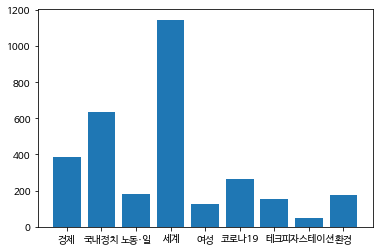

In [ ]:
category = train[['id', 'category']].groupby(['category']).count()  # 카테고리별 기사 개수

plt.rc('font', family='NanumBarunGothic') # 시각화
plt.bar(category.index, category['id'])

In [ ]:
train['date'] = pd.to_datetime(train['date'])
train['year'] = [x.year for x in train['date']]
train['month'] = [x.month for x in train['date']]
train['day'] = [x.day for x in train['date']]

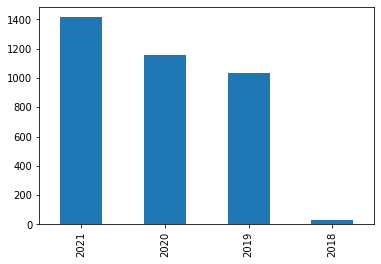

In [ ]:
pd.value_counts(train['year'].values, sort=True).plot.bar()

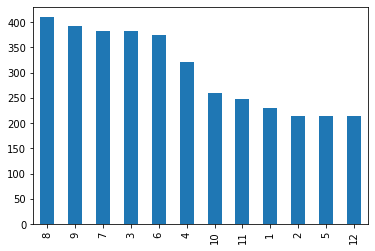

In [ ]:
pd.value_counts(train['month'].values, sort=True).plot.bar()

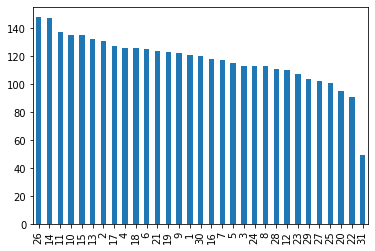

In [ ]:
pd.value_counts(train['day'].values, sort=True).plot.bar()

In [ ]:
# 출처 url
ref = []
for x in train['url']:
    try: ref.append(x.split('/')[2])
    except: ref.append('NULL')

train['ref'] = ref
ref_df = train[['id', 'ref']].groupby(['ref']).count()  # 각 출처 별 개수를 담은 dataframe

In [ ]:
display(ref_df)

,id
ref,
NULL,4
abcnews.go.com,1
about.bgov.com,1
about.fb.com,2
apnews.com,2
...,...
www.youtube.com,48
www.ytn.co.kr,45
www1.president.go.kr,9


<Figure size 1440x1440 with 0 Axes>

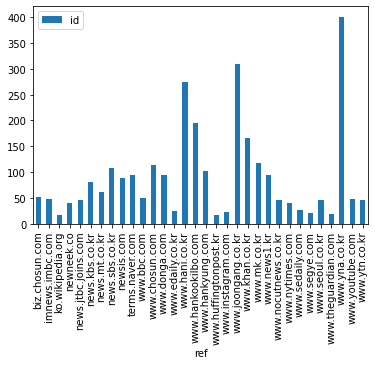

In [ ]:
plt.figure(figsize=(20,20))
over_15 = ref_df[ref_df['id']>15] # 출처가 15개 넘게 존재하는 dataframe
over_15.plot(kind='bar')

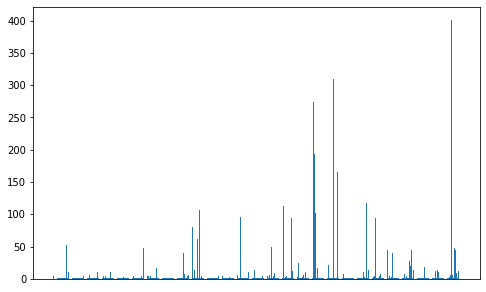

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(ref_df.index, ref_df['id']) # 각 출처 개수를 시각화
plt.xticks([])
plt.show()

In [ ]:
print('고유한 출처 개수:', train['ref'].nunique())
print('15번 넘게 참조된 출처 개수:', len(over_15))
print('15번 넘게 참조된 출처 리스트:', over_15.index)

고유한 출처 개수: 379
15번 넘게 참조된 출처 개수: 32
15번 넘게 참조된 출처 리스트: Index(['biz.chosun.com', 'imnews.imbc.com', 'ko.wikipedia.org', 'newneek.co',
       'news.jtbc.joins.com', 'news.kbs.co.kr', 'news.mt.co.kr',
       'news.sbs.co.kr', 'newsis.com', 'terms.naver.com', 'www.bbc.com',
       'www.chosun.com', 'www.donga.com', 'www.edaily.co.kr', 'www.hani.co.kr',
       'www.hankookilbo.com', 'www.hankyung.com', 'www.huffingtonpost.kr',
       'www.instagram.com', 'www.joongang.co.kr', 'www.khan.co.kr',
       'www.mk.co.kr', 'www.news1.kr', 'www.nocutnews.co.kr',
       'www.nytimes.com', 'www.sedaily.com', 'www.segye.com',
       'www.seoul.co.kr', 'www.theguardian.com', 'www.yna.co.kr',
       'www.youtube.com', 'www.ytn.co.kr'],
      dtype='object', name='ref')


### 2. 텍스트 전처리

In [ ]:
# category 결측치 처리
train['category'].fillna(0, inplace = True)
print(train.isnull().sum())

id                  0
category            0
title               0
date                0
summary             0
original_text    1168
url                 0
dtype: int64


In [ ]:
nan = train[train['original_text'].isnull()]
full = train.dropna()

print(nan.shape)
print(full.shape)

(1168, 7)
(2470, 7)


In [ ]:
# 결측치 처리
train.dropna(inplace = True)
print(train.shape)

(2470, 7)


In [ ]:
train['length'] = [len(str(x)) for x in train['original_text']]  # 원문 길이
train['words_count'] = [len(x.split(' ')) for x in train['original_text']]  # 원문 단어 개수
train['sent_count'] = [len(x.split('.')) for x in train['original_text']]  # 원문 문장 개수

In [ ]:
train['sum_length'] = [len(str(x)) for x in train['summary']] # 요약문 길이
train['sum_words_count'] = [len(x.split(' ')) for x in train['summary']]  # 요약문 단어 개수
train['sum_sent_count'] = [len(x.split('.')) for x in train['summary']]  # 요약문 문장 개수

In [ ]:
display(train)

,id,category,title,date,summary,original_text,url,length,words_count,sent_count,sum_length,sum_words_count,sum_sent_count
0,0,세계,다시 시작되는 해외여행,2021/10/15,"요즘에는 신혼여행 가려는 사람들이 갈 곳이 없어서가 아니라, 해외로 갈 곳이 많아져...","© News1 이은현 디자이너 ""관광객이 몰리는 것은 국내·외 구분 없이...",https://www.news1.kr/articles/?4457902,2425,578,39,55,11,2
1,0,세계,다시 시작되는 해외여행,2021/10/15,"사이판 🇲🇵: 우리나라와 트래블 버블을 가장 먼저 맺은 나라인데, 올해 안에는 가고...",◆ 둑 터진 보복여행 ◆ 해외여행이 돌아왔다. '위드(With) 코로나' 기대감이...,https://www.mk.co.kr/news/culture/view/2021/10...,2755,654,44,155,40,4
2,0,세계,다시 시작되는 해외여행,2021/10/15,싱가포르 🇸🇬: 백신을 다 맞고 2주가 지난 사람은 접종 증명서 & 검사 음성 확인...,"[앵커] 우리나라가 사이판에 이어 싱가포르와도 격리면제 여행권역, 이른바 트래블버...",https://news.kbs.co.kr/news/view.do?ncd=5298972,1883,462,26,165,38,4
3,0,세계,다시 시작되는 해외여행,2021/10/15,태국 🇹🇭: 트래블 버블 없이도 다음달부터 백신을 다 맞은 사람한테 문을 열 예정이...,"泰, 저위험 10개국에 입국 허용 싱가포르 ‘VTL제’ 도입 확대 베트남·인니 등 ...",https://www.segye.com/newsView/20211012514320,1286,294,17,112,26,3
4,0,세계,다시 시작되는 해외여행,2021/10/15,미국 🇺🇸: 다음달부터 세계보건기구(WHO)가 인정한 백신을 다 맞은 사람은 모두 ...,<앵커> 미국이 다음 달부터 백신 접종을 완료한 외국인의 입국을 전면 허용하기로 ...,https://news.sbs.co.kr/news/endPage.do?news_id...,859,207,15,78,15,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3630,1088,세계,화웨이 CFO 체포,2018/12/10,캐나다에서? 무슨 이유로?미국의 요청으로요. 미국이 이란을 압박하려고 경제 제재를 ...,지난 1일 체포된 화웨이의 창업주 딸 멍완저우 CFO.[AP=연합뉴스] 지난 1일...,https://www.joongang.co.kr/article/23189253#home,3018,687,45,173,38,4
3632,1088,세계,화웨이 CFO 체포,2018/12/10,"앞에선 무역이랑 안보는 또 별개라면서 시치미를 떼고 있지만, 뒤에서는 백악관도 국회...",미국이 중국 화웨이 창업자 딸 멍완저우(孟晩舟·46·사진) 체포와 무역전쟁 휴전과는...,https://www.chosun.com/site/data/html_dir/2018...,996,229,19,121,28,2
3633,1088,세계,화웨이 CFO 체포,2018/12/10,"+ 비슷하게 지난 4월, 미국은 대북한·대이란 제재 위반을 이유로 중국의 또 다른 ...",중국 최대의 통신장비 기업 화웨이의 최고재무책임자(CFO) 멍완저우(46)가 미국 ...,https://www.hani.co.kr/arti/international/chin...,2587,564,52,129,29,3
3634,1088,세계,화웨이 CFO 체포,2018/12/10,"+ 중국에서도 ‘아이폰 등 미국 제품 불매, 화웨이 구매 지지 운동’이 일어나고 있...",공산당 기관지 런민일보 자매지이자 민족주의 성향 보여온 환추시보 책임자의 이례적 발...,https://www.donga.com/news/article/all/2018120...,1782,411,23,195,43,5


In [ ]:
print('average doc length: (words)', np.array(train['words_count']).mean())
print('average doc length: (sentences)', np.array(train['sent_count']).mean())

print('average summary length: (words)', np.array(train['sum_words_count']).mean())
print('average summary length: (sentences)', np.array(train['sum_sent_count']).mean())

average doc length: (words) 473.9398862713241
average doc length: (sentences) 34.86799350121852
average summary length: (words) 43.66693744922827
average summary length: (sentences) 4.870024370430544


- Text Summarization with Pretrained Encoders 논문에서 활용한 데이터셋과 뉴닉 크롤링 데이터셋을 비교해보자.
    - CNN/DailyMail, NYT 데이터셋과 평균 문장길이가 유사하다.
    - 요약문 문장의 길이는 아래 표의 데이터셋보다 긴 편.

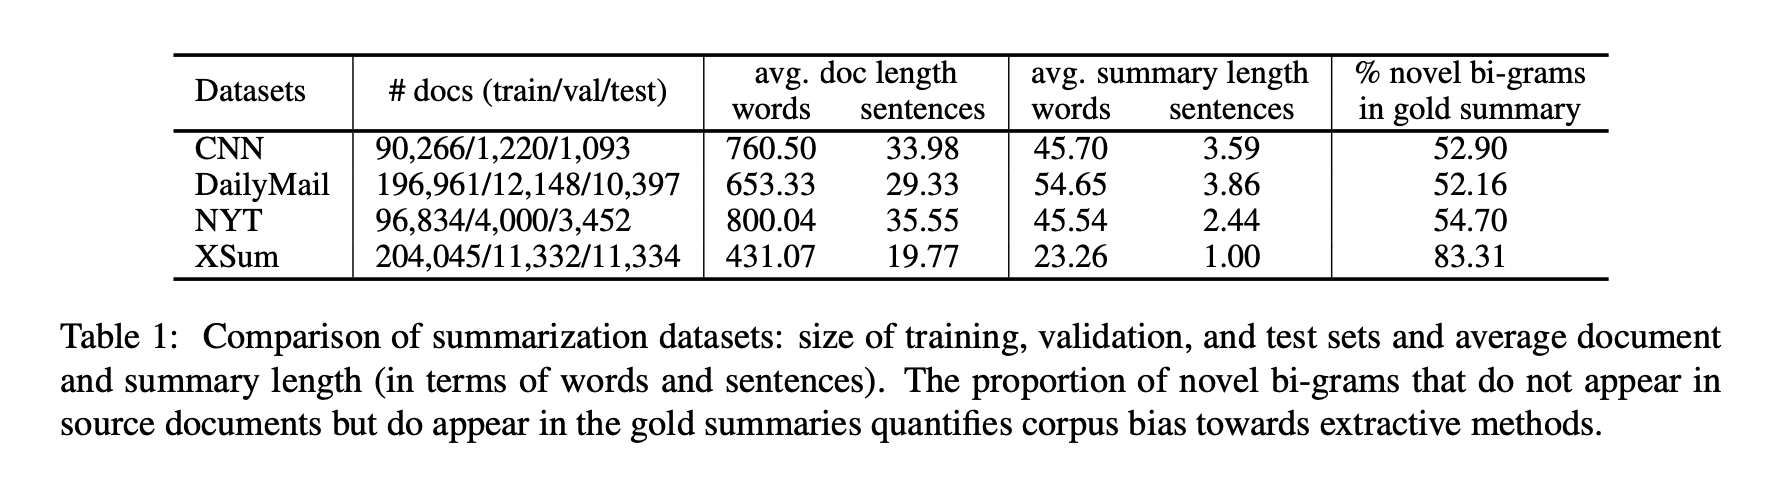

Text(0.5, 1.0, 'length of summary')

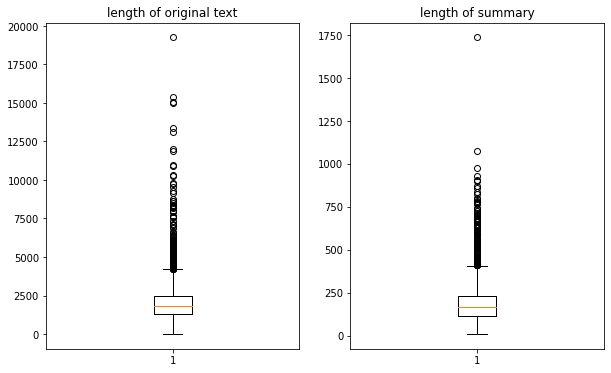

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.boxplot(train['length'])
plt.title('length of original text')

plt.subplot(1,2,2)
plt.boxplot(train['sum_length'])
plt.title('length of summary')

In [ ]:
# outliers 처리
train = train[train['sum_length'] < 1200]
train = train[train['length'] < 12000]
print(train.shape)

(2462, 13)


(array([ 62., 452., 670., 605., 316., 142.,  65.,  46.,  28.,  29.,  12.,
          6.,   6.,   8.,   5.,   2.,   3.,   2.,   2.,   1.]),
 array([2.00000e+00, 5.96800e+02, 1.19160e+03, 1.78640e+03, 2.38120e+03,
        2.97600e+03, 3.57080e+03, 4.16560e+03, 4.76040e+03, 5.35520e+03,
        5.95000e+03, 6.54480e+03, 7.13960e+03, 7.73440e+03, 8.32920e+03,
        8.92400e+03, 9.51880e+03, 1.01136e+04, 1.07084e+04, 1.13032e+04,
        1.18980e+04]),
 <a list of 20 Patch objects>)

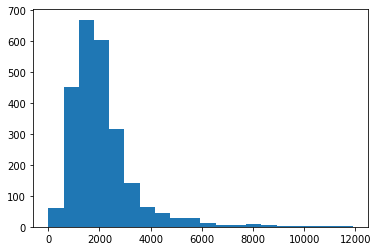

In [ ]:
plt.hist(train['length'], bins=20)

In [ ]:
# 텍스트 전처리
# 이모지 없애기
!pip install emoji

import emoji
import re

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def preprocess_text(text):
    text = text.replace(u'\xa0', u'')  # html 처리
    
    # 이메일 전처리 (이메일 형식과 일치하면 공백으로 대체)
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'
    text = re.sub(pattern=pattern, repl="", string=text)
    
    # 날짜 전처리 (예를 들면 2021.01.09. 형식의 날짜를 공백으로 대체)
    
    # 불필요한 기호 공백으로 대체
    text = re.sub(r'[^가-힣a-zA-Z0-9.,?!-~%]+', " ", text)
    return text

def summary_preprocess(text):
    text = re.sub('[+:]', '', text)
    return text

train['title'] = train['title'].apply(give_emoji_free_text)
train['title'] = train['title'].apply(preprocess_text)
train['summary'] = train['summary'].apply(give_emoji_free_text)
train['summary'] = train['summary'].apply(preprocess_text)
train['summary'] = train['summary'].apply(summary_preprocess)
train['original_text'] = train['original_text'].apply(preprocess_text)

In [ ]:
display(train)

,id,category,title,date,summary,original_text,url,length,words_count,sent_count,sum_length,sum_words_count,sum_sent_count
0,0,세계,다시 시작되는 해외여행,2021/10/15,"요즘에는 신혼여행 가려는 사람들이 갈 곳이 없어서가 아니라, 해외로 갈 곳이 많아져...","News1 이은현 디자이너 ""관광객이 몰리는 것은 국내 외 구분 없이 마찬가지일 ...",https://www.news1.kr/articles/?4457902,2425,578,39,55,11,2
1,0,세계,다시 시작되는 해외여행,2021/10/15,"사이판 우리나라와 트래블 버블을 가장 먼저 맺은 나라인데, 올해 안에는 가고 싶어도...",둑 터진 보복여행 해외여행이 돌아왔다. '위드(With) 코로나' 기대감이 커지면...,https://www.mk.co.kr/news/culture/view/2021/10...,2755,654,44,155,40,4
2,0,세계,다시 시작되는 해외여행,2021/10/15,싱가포르 백신을 다 맞고 2주가 지난 사람은 접종 증명서 & 검사 음성 확인서 & ...,"[앵커] 우리나라가 사이판에 이어 싱가포르와도 격리면제 여행권역, 이른바 트래블버블...",https://news.kbs.co.kr/news/view.do?ncd=5298972,1883,462,26,165,38,4
3,0,세계,다시 시작되는 해외여행,2021/10/15,태국 트래블 버블 없이도 다음달부터 백신을 다 맞은 사람한테 문을 열 예정이에요. ...,", 저위험 10개국에 입국 허용 싱가포르 VTL제 도입 확대 베트남 인니 등 접종...",https://www.segye.com/newsView/20211012514320,1286,294,17,112,26,3
4,0,세계,다시 시작되는 해외여행,2021/10/15,미국 다음달부터 세계보건기구(WHO)가 인정한 백신을 다 맞은 사람은 모두 입국할 ...,<앵커> 미국이 다음 달부터 백신 접종을 완료한 외국인의 입국을 전면 허용하기로 했...,https://news.sbs.co.kr/news/endPage.do?news_id...,859,207,15,78,15,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,1088,세계,화웨이 CFO 체포,2018/12/10,캐나다에서? 무슨 이유로?미국의 요청으로요. 미국이 이란을 압박하려고 경제 제재를 ...,지난 1일 체포된 화웨이의 창업주 딸 멍완저우 CFO.[AP=연합뉴스] 지난 1일(...,https://www.joongang.co.kr/article/23189253#home,3018,687,45,173,38,4
2458,1088,세계,화웨이 CFO 체포,2018/12/10,"앞에선 무역이랑 안보는 또 별개라면서 시치미를 떼고 있지만, 뒤에서는 백악관도 국회...",미국이 중국 화웨이 창업자 딸 멍완저우( 46 사진) 체포와 무역전쟁 휴전과는 별개...,https://www.chosun.com/site/data/html_dir/2018...,996,229,19,121,28,2
2459,1088,세계,화웨이 CFO 체포,2018/12/10,"비슷하게 지난 4월, 미국은 대북한 대이란 제재 위반을 이유로 중국의 또 다른 통...",중국 최대의 통신장비 기업 화웨이의 최고재무책임자(CFO) 멍완저우(46)가 미국 ...,https://www.hani.co.kr/arti/international/chin...,2587,564,52,129,29,3
2460,1088,세계,화웨이 CFO 체포,2018/12/10,"중국에서도 아이폰 등 미국 제품 불매, 화웨이 구매 지지 운동 이 일어나고 있어요...",공산당 기관지 런민일보 자매지이자 민족주의 성향 보여온 환추시보 책임자의 이례적 발...,https://www.donga.com/news/article/all/2018120...,1782,411,23,195,43,5


In [ ]:
train.reset_index(drop=True, inplace=True)

# 샘플 찍어보기
for i in range(0, 2000, 100):
    print("요약:", train['summary'][i])
    print("원문:", train['original_text'][i])
    print("-"*100)

요약: 요즘에는 신혼여행 가려는 사람들이 갈 곳이 없어서가 아니라, 해외로 갈 곳이 많아져서 고민이라고. 
원문:  News1 이은현 디자이너 "관광객이 몰리는 것은 국내 외 구분 없이 마찬가지일 텐데 . 다음 달 중순 예식인데 국내 여행을 취소하고 신혼여행지로 하와이를 가기로 했습니다."(11월 예식을 앞둔 예비신부 A씨) "결혼식 본식 두 달을 앞두고 있는 예비신부입니다. 이미 제주로 항공권 숙박 예매를 완료했지만 일부 국가가 자기 격리 조항을 완화하면서 마지막까지 신혼 여행지를 해외로 바꿀지 고민 중입니다."(12월 결혼을 앞둔 예비신부 B씨) 코로나19(신종 코로나바이러스 감염증) 백신 2차 접종자 및 PCR(유전자증폭) 검사지 보유 관광객에 대한 '격리 면제' 국가가 늘면서 신혼 여행지로 해외를 고민하는 예비부부가 많아졌다. 특히 정부가 사이판에 이어 싱가포르까지 '트래블버블(여행안전권역)' 협약을 맺으면서 해외 여행길에 대한 수요는 더욱 늘어날 전망이다. 예비부부들 "제주도 대신 해외 휴양지갈래요" 입국시 자가 격리 면제 지역이 확대되면서 해외여행으로 눈을 돌리는 이들이 많아지고 있다. '백신 2차 접종'까지 완료하고 PCR 검사만 받으면 자가 격리 없이 머무를 수 있는 여행지가 늘고 있어서다. 결혼을 앞둔 예비신부 A씨는 예식 한 달을 앞두고 신혼여행을 떠나기 위해 예약한 제주도 항공권 호텔 예약을 모두 취소했다. 막판까지 신혼 여행지를 두고 고민하다 괌으로 여행지를 변경한 것. 국내 관광객들로 북적이는 제주도 대신 비교적 한산한 휴양지로 여행을 가는 것이 낫다는 판단에서다. A씨는 "제주도 신혼여행이 해외랑 맞먹는 가격인 데다 관광객들이 몰리는 제주도 보다는 휴양지로 조용한 곳에 머물 수 있는 휴양지가 낫다고 생각했다"며 "조만간 백신 접종 완료를 앞둔 만큼 직장에 미리 양해를 구하고 신혼 여행지를 변경하게 됐다"고 말했다. 신혼여행지로 가장 인기 있는 지역은 몰디브 하와이 괌 등이다. 휴양지로 잘 알려진 지역으로 비교적 한산한 분위기인 데다 백

In [ ]:
train.to_csv("/content/drive/MyDrive/data/newneek/claen_train_211016", index=False)